In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_1 = pd.read_excel('/content/online_retail_II.xlsx', sheet_name='Year 2009-2010')
data_2 = pd.read_excel('/content/online_retail_II.xlsx', sheet_name='Year 2010-2011')

In [5]:
df = pd.concat([data_1,data_2])
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [6]:
df.describe()

Quantity         Price    Customer ID
count  1.067371e+06  1.067371e+06  824364.000000
mean   9.938898e+00  4.649388e+00   15324.638504
std    1.727058e+02  1.235531e+02    1697.464450
min   -8.099500e+04 -5.359436e+04   12346.000000
25%    1.000000e+00  1.250000e+00   13975.000000
50%    3.000000e+00  2.100000e+00   15255.000000
75%    1.000000e+01  4.150000e+00   16797.000000
max    8.099500e+04  3.897000e+04   18287.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [8]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

<Axes: >

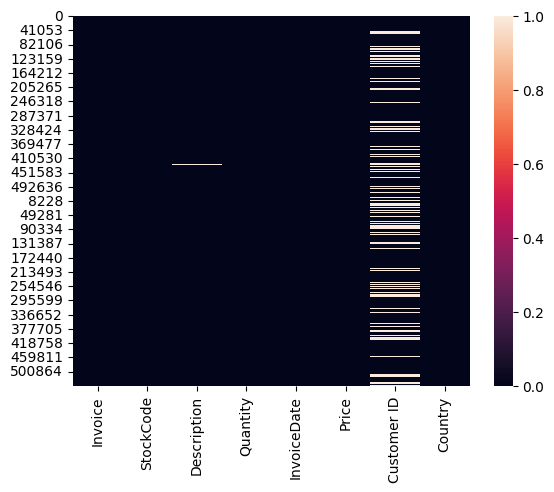

In [9]:
#Check null values by ploting
sns.heatmap(df.isnull())

In [10]:
df['Customer ID'] = df['Customer ID'].fillna(df['Customer ID'].median())

In [46]:
df.dropna(inplace=True)

In [47]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [43]:
df.shape

(1067371, 8)

In [48]:
df['Customer ID'].duplicated().value_counts()

True     1057047
False       5942
Name: Customer ID, dtype: int64

In [49]:
df['Country'].value_counts()

United Kingdom          976948
EIRE                     17866
Germany                  17624
France                   14330
Netherlands               5140
Spain                     3811
Switzerland               3189
Belgium                   3123
Portugal                  2620
Australia                 1913
Channel Islands           1664
Italy                     1534
Norway                    1455
Sweden                    1364
Cyprus                    1176
Finland                   1049
Austria                    938
Denmark                    817
Unspecified                756
Greece                     663
Japan                      582
Poland                     535
USA                        535
United Arab Emirates       500
Israel                     371
Hong Kong                  364
Singapore                  346
Malta                      299
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        169
Bahrain 

## Uni-variate Analysis

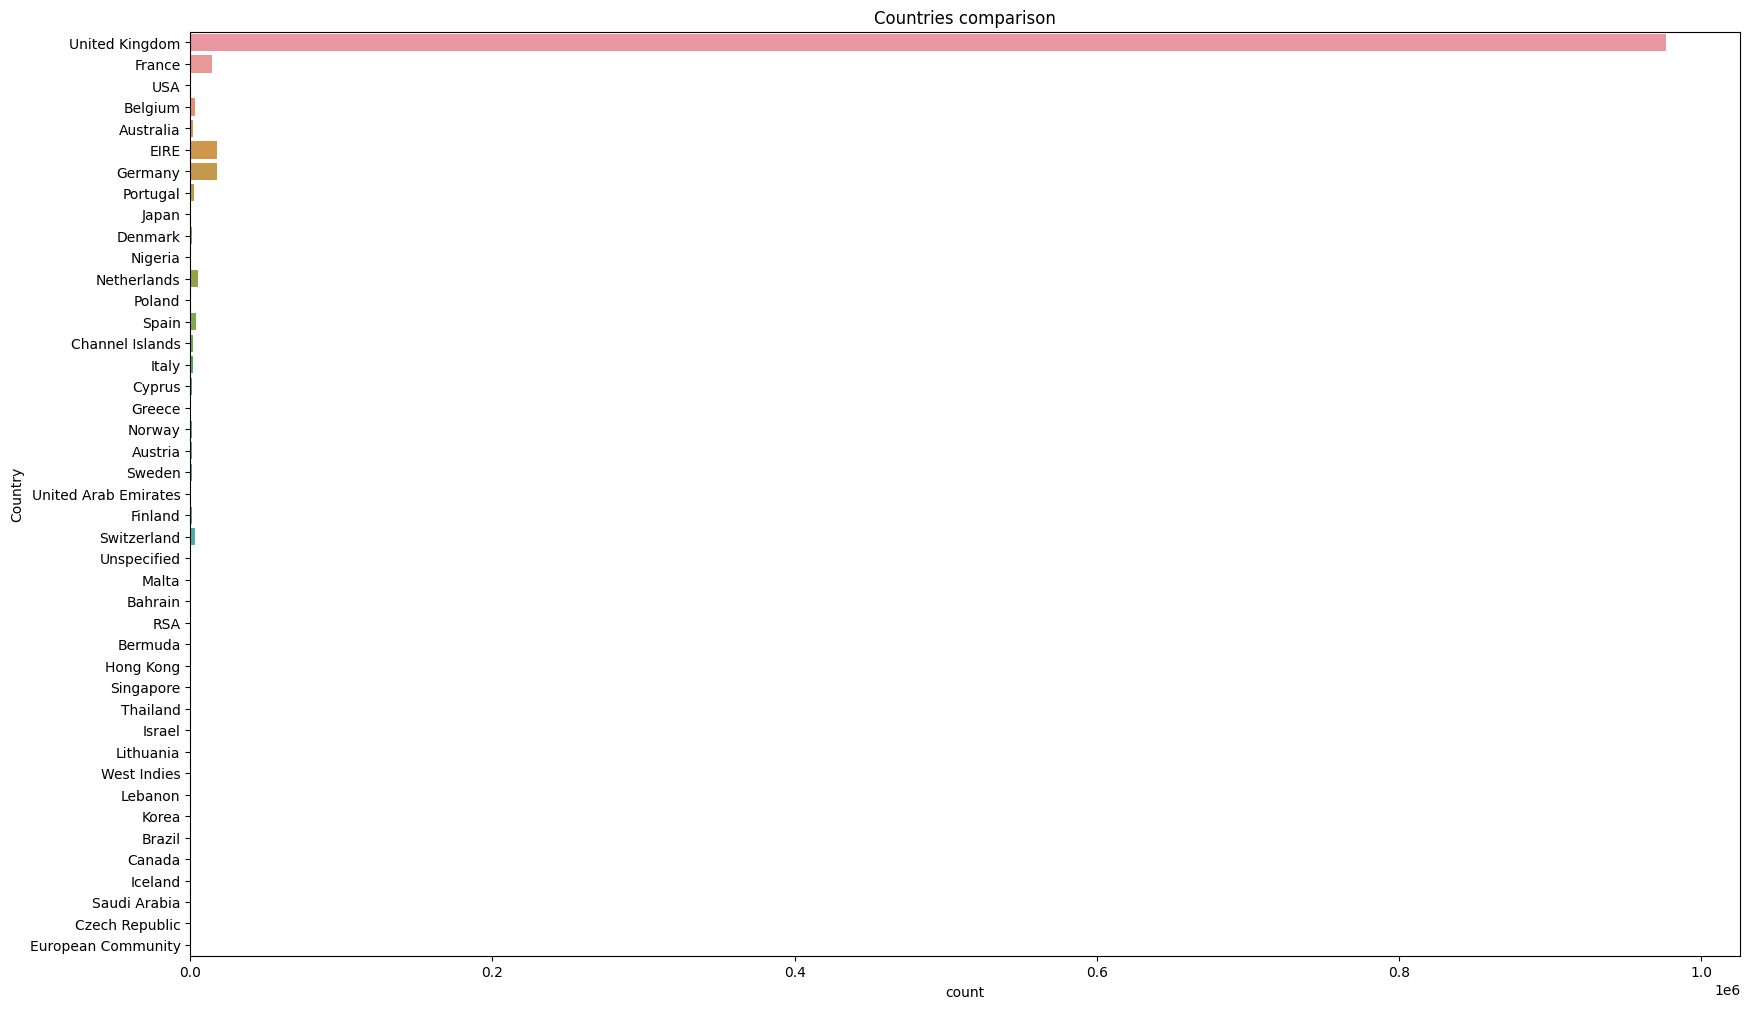

In [50]:
plt.figure(figsize=[20,12])
sns.countplot(y='Country',data = df)
plt.title('Countries comparison');

## Bi-Variate Analysis

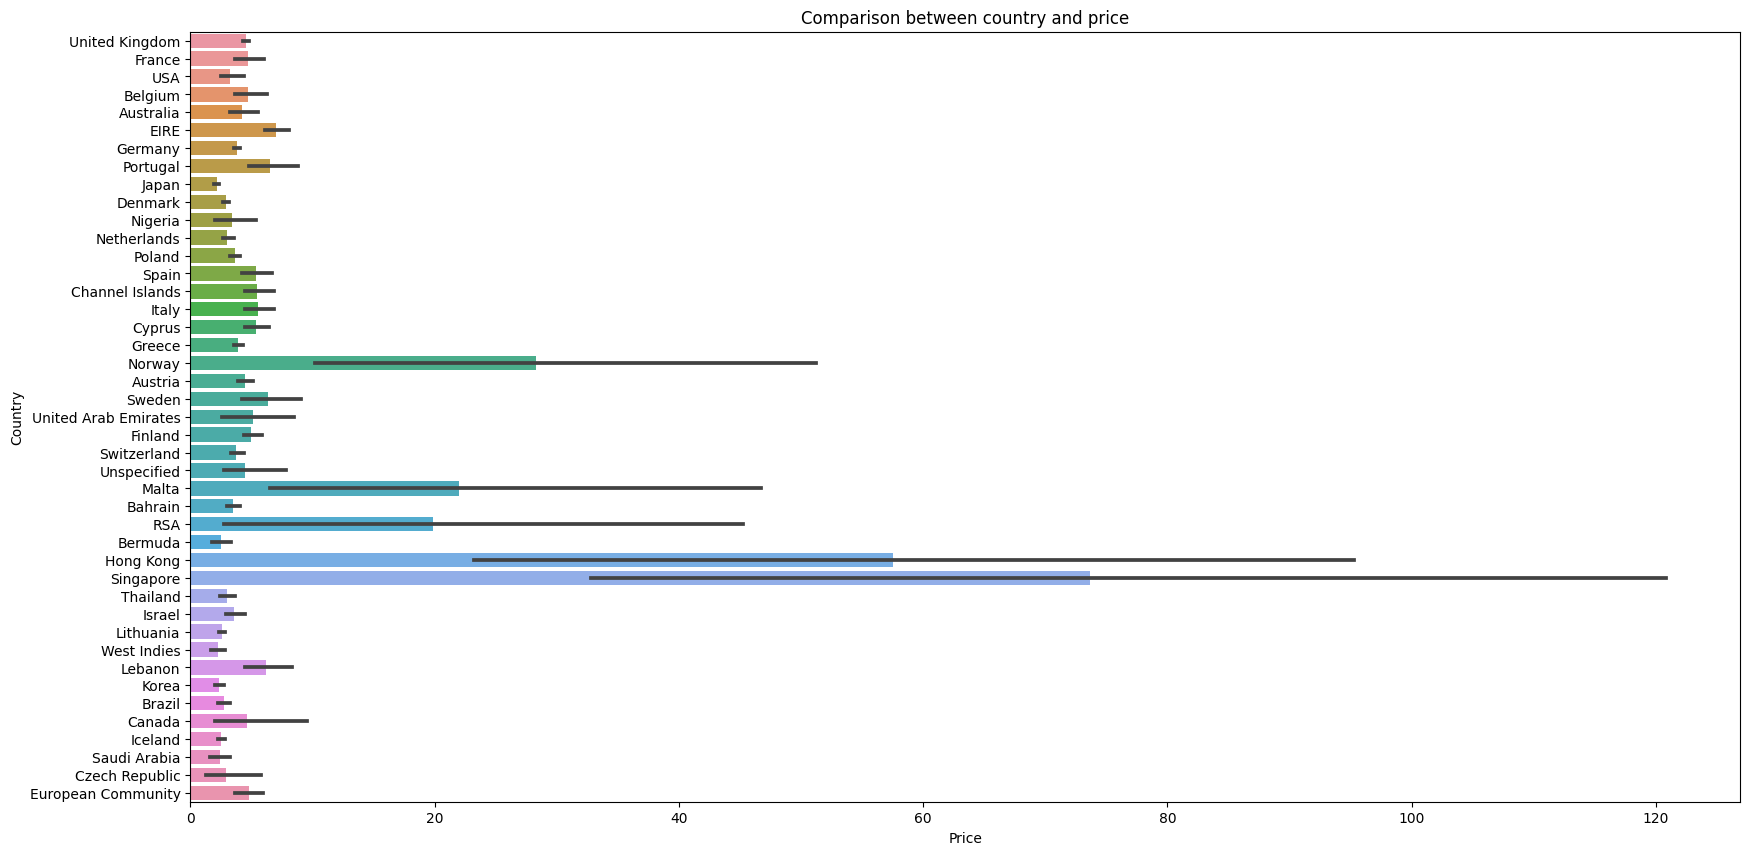

In [51]:
# Plotting barplot.
plt.figure(figsize=(20,10))
sns.barplot(x='Price',y='Country',data=df)
plt.title('Comparison between country and price');

In [52]:
df['Invoice'].value_counts()

537434     1350
538071     1304
537638     1202
537237     1194
536876     1186
           ... 
517119        1
C504360       1
C540814       1
560917        1
559920        1
Name: Invoice, Length: 49353, dtype: int64

In [41]:
df1= df.loc[df["Invoice"].str.startswith('C', na=False)]


In [42]:
df1

Invoice StockCode                       Description  Quantity  \
178     C489449     22087          PAPER BUNTING WHITE LACE       -12   
179     C489449    85206A      CREAM FELT EASTER EGG BASKET        -6   
180     C489449     21895     POTTING SHED SOW 'N' GROW SET        -4   
181     C489449     21896                POTTING SHED TWINE        -6   
182     C489449     22083        PAPER CHAIN KIT RETRO SPOT       -12   
...         ...       ...                               ...       ...   
540449  C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541  C581499         M                            Manual        -1   
541715  C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716  C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717  C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate   Price  Customer ID         Country  
178    2009-12-01 10:33:00    2.95      16321.0       Australia  
179    2009-12-01 10:33:00    1.65      16321.0       Australia  
180    2009-12-01 10:33:00    4.25      16321.0       Australia  
181    2009-12-01 10:33:00    2.10      16321.0       Australia  
182    2009-12-01 10:33:00    2.95      16321.0       Australia  
...                    ...     ...          ...             ...  
540449 2011-12-09 09:57:00    0.83      14397.0  United Kingdom  
541541 2011-12-09 10:28:00  224.69      15498.0  United Kingdom  
541715 2011-12-09 11:57:00   10.95      15311.0  United Kingdom  
541716 2011-12-09 11:58:00    1.25      17315.0  United Kingdom  
541717 2011-12-09 11:58:00    1.25      17315.0  United Kingdom  

[19494 rows x 8 columns]

In [44]:
df["StockCode"].value_counts()

85123A       5829
22423        4424
85099B       4216
21212        3318
20725        3259
             ... 
DCGS0067        1
DCGS0066P       1
DCGS0071        1
DCGS0073        1
90197A          1
Name: StockCode, Length: 5305, dtype: int64

In [45]:
df["StockCode"].nunique() 

5305

In [53]:
df.groupby("StockCode").agg({"Quantity":"sum"}).sort_values(by="Quantity",ascending=False).head(5)

Quantity
StockCode          
84077        108545
85123A        96066
85099B        95739
21212         95450
22197         89125

In [59]:
not_cancelled_Invoices = df[~ df['Invoice'].str.startswith('C', na=False)]

In [60]:
not_cancelled_Invoices.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [62]:
not_cancelled_Invoices.shape

(1041670, 8)

In [63]:
not_cancelled_Invoices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041670 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1041670 non-null  object        
 1   StockCode    1041670 non-null  object        
 2   Description  1041670 non-null  object        
 3   Quantity     1041670 non-null  int64         
 4   InvoiceDate  1041670 non-null  datetime64[ns]
 5   Price        1041670 non-null  float64       
 6   Customer ID  1041670 non-null  float64       
 7   Country      1041670 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 71.5+ MB


In [65]:
country_data = not_cancelled_Invoices.groupby(['Country']).agg(
                     InvoiceCount = ('Invoice', 'count'),
                     QuantityCount = ('Quantity', 'count'),
                     TotalPrice = ('Price', 'sum'),
                     Customers = ('Customer ID', 'count')).reset_index()

In [66]:
country_data.sort_values('TotalPrice', ascending=False, 
                               inplace=True, ignore_index=True)

In [67]:
country_data

Country  InvoiceCount  QuantityCount   TotalPrice  Customers
0         United Kingdom        958501         958501  3854202.837     958501
1                   EIRE         17349          17349    94608.190      17349
2                Germany         16694          16694    60019.251      16694
3                 France         13940          13940    59280.470      13940
4                 Norway          1436           1436    20398.710       1436
5                  Spain          3719           3719    15781.170       3719
6            Netherlands          5088           5088    13672.220       5088
7              Singapore           339            339    13322.500        339
8                Belgium          3068           3068    13004.680       3068
9               Portugal          2562           2562    12720.290       2562
10           Switzerland          3136           3136    11775.210       3136
11             Hong Kong           358            358    11101.860        358
12       Channel Islands          1569           1569     7275.820       1569
13                 Italy          1468           1468     6995.990       1468
14                Sweden          1338           1338     6565.780       1338
15             Australia          1812           1812     6529.870       1812
16                Cyprus          1155           1155     5885.470       1155
17               Finland          1032           1032     4918.200       1032
18               Austria           922            922     3947.710        922
19                 Malta           282            282     3768.020        282
20                Greece           657            657     2530.780        657
21               Denmark           798            798     2277.970        798
22           Unspecified           752            752     2185.910        752
23  United Arab Emirates           467            467     2007.350        467
24                   RSA           167            167     1918.560        167
25                Poland           512            512     1861.960        512
26                   USA           409            409     1463.090        409
27                Israel           369            369     1315.410        369
28                Canada           228            228     1058.090        228
29                 Japan           485            485      972.760        485
30               Iceland           253            253      644.160        253
31             Lithuania           189            189      494.410        189
32               Bahrain           124            124      431.430        124
33               Lebanon            57             57      318.940         57
34    European Community            60             60      289.800         60
35                Brazil            94             94      256.310         94
36              Thailand            76             76      227.970         76
37           West Indies            54             54      122.770         54
38                 Korea            53             53      120.160         53
39               Nigeria            30             30      102.480         30
40               Bermuda            34             34       84.700         34
41        Czech Republic            25             25       78.270         25
42          Saudi Arabia             9              9       21.160          9

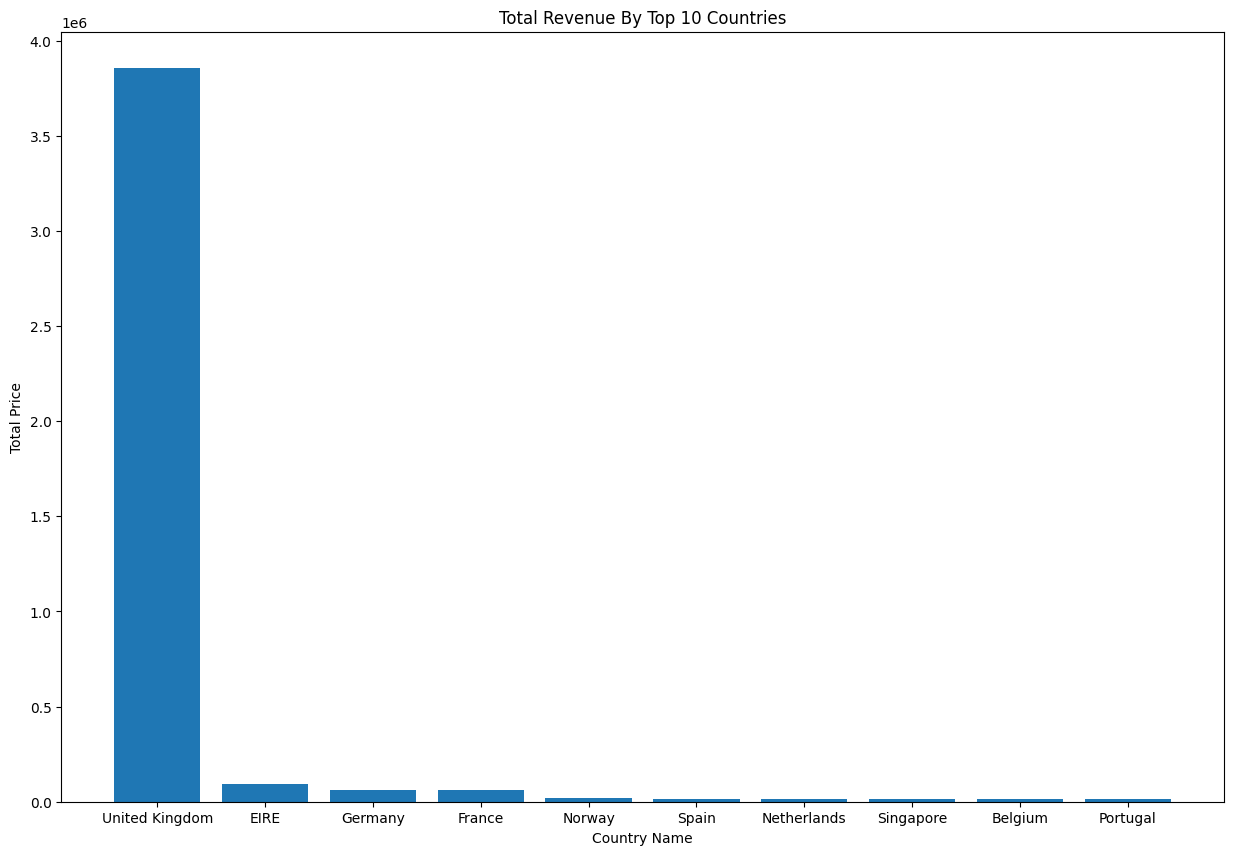

In [71]:
#Top 10 countrires by Revenue
fig = plt.figure(figsize = (15, 10))
 
plt.bar(country_data['Country'].head(10), country_data['TotalPrice'].head(10), 
        )
 
plt.xlabel("Country Name")
plt.ylabel("Total Price")
plt.title("Total Revenue By Top 10 Countries")
plt.show()